In [1]:
from scipy.io.wavfile import write, read
from scipy import signal
from scipy.fftpack import fft, ifft, fftshift, fftfreq
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd

import utilFunctions as UF

In [2]:
# leitura do sinal da gaita

fs, gaita_in = UF.wavread('../gaita.wav')

In [3]:
# Audio de entrada

sd.play(gaita_in)

In [4]:
# Obtendo a envoltória com filtro passa baixa

gaita_abs = abs(gaita_in)

fc = 30          #freq de corte
Wn = fc / fs / 2     #freq de corte normalizada

print(Wn)

b, a = signal.butter(3, Wn)
env_filt = signal.filtfilt(b, a, gaita_abs)
env_lfilt = signal.lfilter(b, a, gaita_abs)

0.0003401360544217687


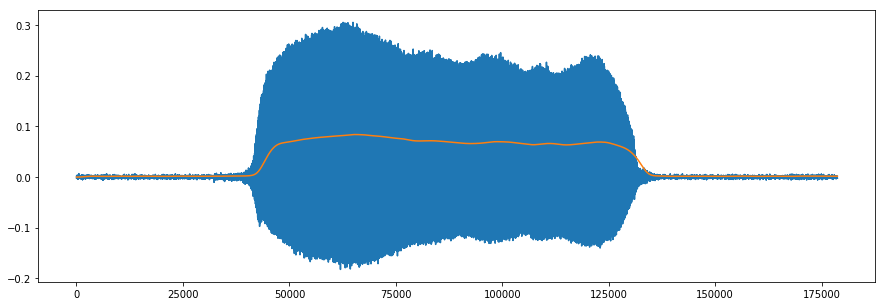

In [5]:
# Plot envoltória com filtro

plt.figure(figsize=(15,5))
# plt.plot(gaita_abs)
plt.plot(gaita_in)
plt.plot(env_lfilt)

plt.show()

In [6]:
# Array de tempo

amostras = np.arange(len(gaita_in))
t = amostras / fs

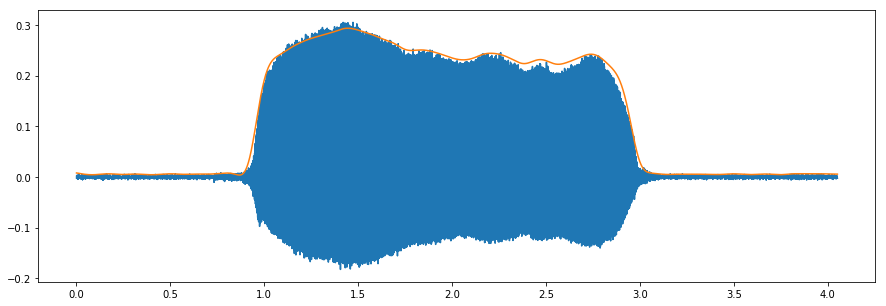

In [7]:
# Multiplicando a envoltória encontrada por uma constante para aproximar ao sinal original

plt.figure(figsize=(15,5))

env_filt_ganho = 3.5 * env_filt
plt.plot(t, gaita_in)
plt.plot(t, env_filt_ganho)

plt.show()

In [8]:
# Aplicando FFT no sinal da gaita

gaita_fft = fft(gaita_in)

In [12]:
# Definindo eixo das frequencias

gaita_freqs = np.linspace(0.0, fs/2, gaita_in.size//2)

# Acertando a amplitude da fft
# Os valores absolutos da FFT dividido pela metade da frequencia de amostragem. Correto?

amp_gaita_fft = abs(gaita_fft[:int(gaita_fft.size/2)]) / (fs/2)

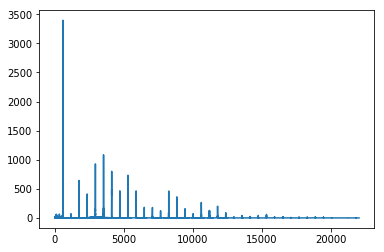

In [17]:
#Plot FFT domínio da frequência

plt.plot(gaita_freqs, abs(gaita_fft)[:int(gaita_fft.size/2)])
plt.show()

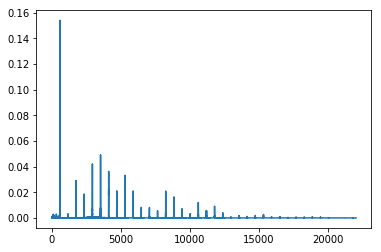

In [18]:
#Plot FFT com amplitude corrigida

plt.plot(gaita_freqs, amp_gaita_fft)
plt.show()

In [35]:
# Encontrando as frequências e amplitude relativa

pico_loc = []

for i in range (1, amp_gaita_fft.size):
    if amp_gaita_fft[i-1] < amp_gaita_fft[i] and amp_gaita_fft[i] > amp_gaita_fft[i + 1]:
        if amp_gaita_fft[i] > 0.015:
            pico_loc.append(i)

In [43]:
timbre = 0
timbre2 = 0
for loc in pico_loc:
    timbre += (amp_gaita_fft[loc] * np.cos(2 * np.pi * gaita_freqs[loc] * t))

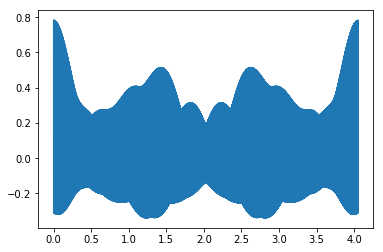

In [54]:
%matplotlib inline
plt.plot(t,timbre)
plt.show()

In [55]:
gaita_out = timbre * env_filt

In [56]:
sd.play(gaita_out)

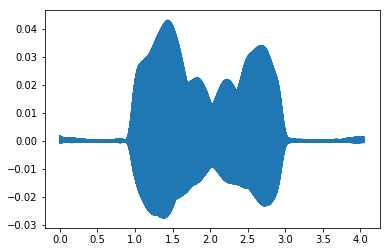

In [57]:
plt.plot(t,gaita_out)
plt.show()

In [58]:
UF.wavwrite(gaita_out, fs, '../gaita_emu.wav')